Hosts inicializados
Canais inicializados
Pares EPRs adicionados


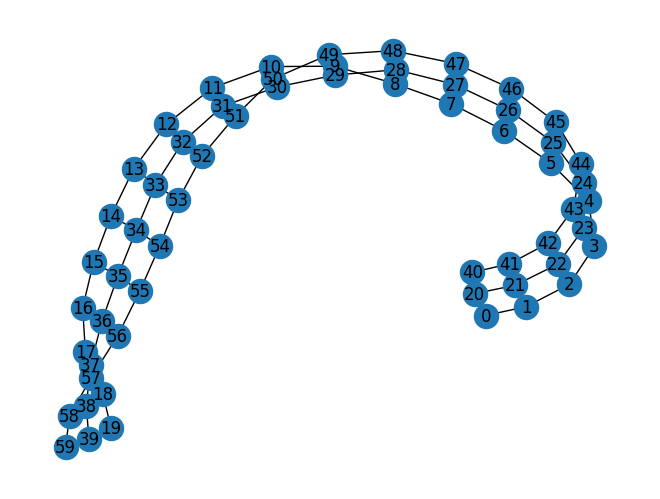

In [40]:
# Inicialização comum da rede
from quantumnet.components import Controller, Network
rede = Network()
controlador = Controller(rede)
rede.set_ready_topology("Grade", 3, 20)
rede.draw()

As decisões são objetos com o método verify que retorna True ou False, dependendo da request recebida. O controlador tem um dicionário cujas chaves são os métodos verify das decisões e os valores são as ações que serão tomadas. 

In [41]:
alice_id = 0
bob_id = 8
fmin = 0.7
eprs = 3
request = [alice_id, bob_id, fmin, eprs]
actions = controlador.apply_conditions(request)

Decisão aplicada: (Normal E2E,)


In [42]:
alice = rede.get_host(alice_id)
controlador.add_match_route_rule_in_host(request, alice)
print(alice.flow_table)

Decisão aplicada: (Normal E2E,)
Adicionando match, rota e regra à tabela de fluxo.
{(8, 0.7, 3): ([0, 1, 2, 3, 4, 5, 6, 7, 8], BasicRule)}


In [43]:
request2 = [alice_id, 8, 0.5, 1]
alice.find_rule_by_request(request2)

([0, 1, 2, 3, 4, 5, 6, 7, 8], BasicRule)

In [44]:
flow = alice.find_rule_by_request(request2)

In [45]:
print("Tabela de fluxo de Alice", alice.flow_table)
print(f"Fluxo de Alice para a requests {request2}:", flow)


Tabela de fluxo de Alice {(8, 0.7, 3): ([0, 1, 2, 3, 4, 5, 6, 7, 8], BasicRule)}
Fluxo de Alice para a requests [0, 8, 0.5, 1]: ([0, 1, 2, 3, 4, 5, 6, 7, 8], BasicRule)


In [46]:
roule = flow[1]

In [47]:
print("Roule", roule)

Roule BasicRule


In [48]:
controlador.run_rule(roule)

Tempo: 1
Tempo: 2
Executando ação: Swap(0-1-2)
Running Swap(0-1-2)
Executando ação: Swap(1-2-3)
Running Swap(1-2-3)
Executando ação: Swap(2-3-4)
Running Swap(2-3-4)
Executando ação: Swap(3-4-5)
Running Swap(3-4-5)
Executando ação: Swap(4-5-6)
Running Swap(4-5-6)
Executando ação: Swap(5-6-7)
Running Swap(5-6-7)
Executando ação: Swap(6-7-8)
Running Swap(6-7-8)
Tempo: 3
Executando ação: Swap(0-2-4)
Running Swap(0-2-4)
Executando ação: Swap(2-4-6)
Running Swap(2-4-6)
Executando ação: Swap(4-6-8)
Running Swap(4-6-8)
Tempo: 4
Executando ação: Swap(0-4-8)
Running Swap(0-4-8)


KeyError: 4